In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [22]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [23]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23',)

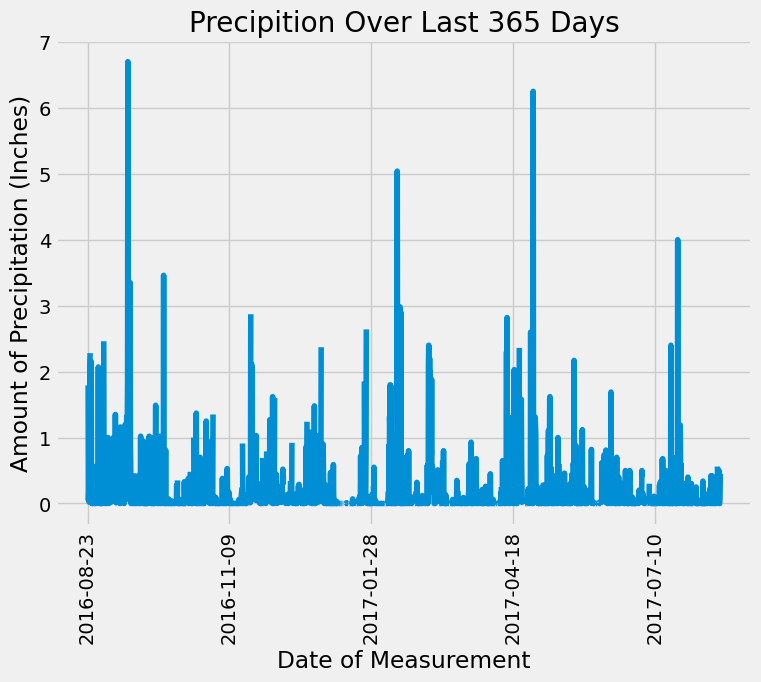

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prev_year_precp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prev_year_precp_df = pd.DataFrame(prev_year_precp, columns=['date', 'precipitation'])

# Sort the dataframe by date
prev_year_precp_df = prev_year_precp_df.set_index('date').sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
prev_year_precp_df.plot(rot=90, figsize=(8,6), legend = False, title = "Precipition Over Last 365 Days", 
                        xlabel="Date of Measurement", ylabel="Amount of Precipitation (Inches)")
plt.show()

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
prev_year_precp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
#View format of data returned
first_station = session.query(station).first()
first_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1241180b0>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [29]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.id)).all()
total_stations

[(9,)]

In [30]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
select = [measurement.station,func.count(measurement.date)]
active_stations = session.query(*select).\
    group_by(measurement.station).\
    order_by(func.count(measurement.date).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
select = [func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]
temperatures = session.query(*select).filter(measurement.station == 'USC00519281').all()
temperatures

[(54.0, 85.0, 71.66378066378067)]

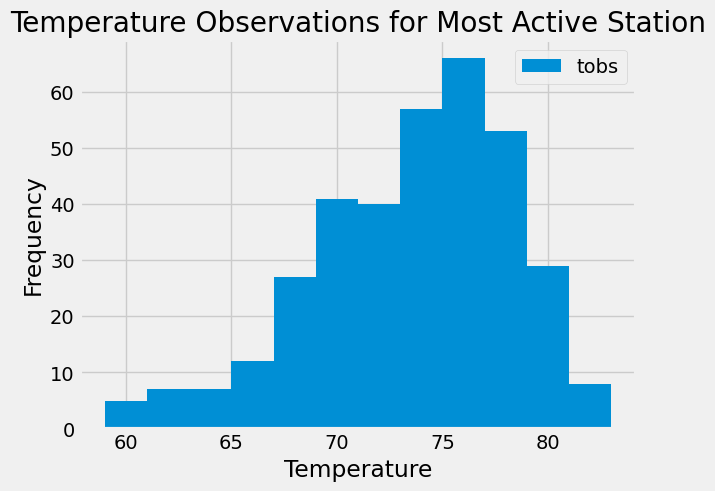

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_tobs = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').filter(measurement.date >= previous_year).all()
year_tobs_df = pd.DataFrame(year_tobs)
year_tobs_df.plot(kind="hist", bins=12)
plt.title('Temperature Observations for Most Active Station')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [33]:
# Close Session
session.close()